In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('scaler_apollo_hospitals.csv')

In [3]:
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


### removing the unnamed column from the dataset

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

### from the info command it is clear that their are total 7 columns(features) and 1338 rows(values).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


### from the below cell we see that their are no missing values in the data. 

In [24]:
df.isna().sum()

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

### from the describe command we see that mean age is 39 years median age is also 39 yaers minimum age is 18 years and the maximum age is 64 years
### mean viral load is 10 and also the median viral load is also 10 min viral load is 5 and the maximim viral load is 17 
### mean severity is 1 median severity is 1 min severity is 0 and the maximum severity is 5 
### mean hostitalization charges are 33176 median charges are 23455 min charges are 2805 and the max charges are 159426(this value is effected by outlyers as the difference between mean and median is too large)

In [6]:
df.describe()

,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,1.094918,33176.058296
std,14.049960,2.032796,1.205493,30275.029296
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.762500,0.000000,11851.000000
50%,39.000000,10.130000,1.000000,23455.000000
75%,51.000000,11.567500,2.000000,41599.500000
max,64.000000,17.710000,5.000000,159426.000000


In [7]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [8]:
df['age'].value_counts()

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

In [9]:
df['viral load'].value_counts()

10.77    13
9.63     13
10.17    12
11.37    12
9.94     10
         ..
12.51     1
11.02     1
8.21      1
6.77      1
11.56     1
Name: viral load, Length: 462, dtype: int64

### for the severity 0 their are 574 cases and for the severity 1 their are 324 cases and for th eseverity 2 their are 240 cases etc 

In [10]:
df['severity level'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64

### the hospitilazition charges vary depends on the case

In [28]:
df['hospitalization charges'].value_counts()

26504    2
20836    2
11799    2
33677    2
35986    2
        ..
4083     1
36187    1
26501    1
99679    1
6144     1
Name: hospitalization charges, Length: 1320, dtype: int64

### for the column region their are 4 unique values southwest southeast nortwest and northeast

In [12]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### from the below we are converting the categorical values to category like for sex we are replacing male with 1 and female with 0 etc 

In [13]:
cal_num = dict({'smoker':{'yes':1,"no":0},'sex':{'male':1,'female':0},'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}})
df = df.replace(cal_num)

## Univariate Analysis

### the following function will plot the boxplots of all the columns present in the dataframe

In [14]:
def box_plots(df):
    plt.figure(figsize=(10,25))
    for i in range(len(df.columns)):
        plt.subplot(7,1,i+1)
        sns.boxplot(data=df,x=df.columns[i])
        plt.ylabel(df.columns[i])
    plt.show()

### except viral load and the hospitilization charges no other feature have outlyers
### most of the seviarity level lyes between 0 and 2 
### the are group 25 to 52 are the most effected people
### the regions 1 and 2 are most effected
### mostly the viral load is between 8 and 10 viral load is having outlyers

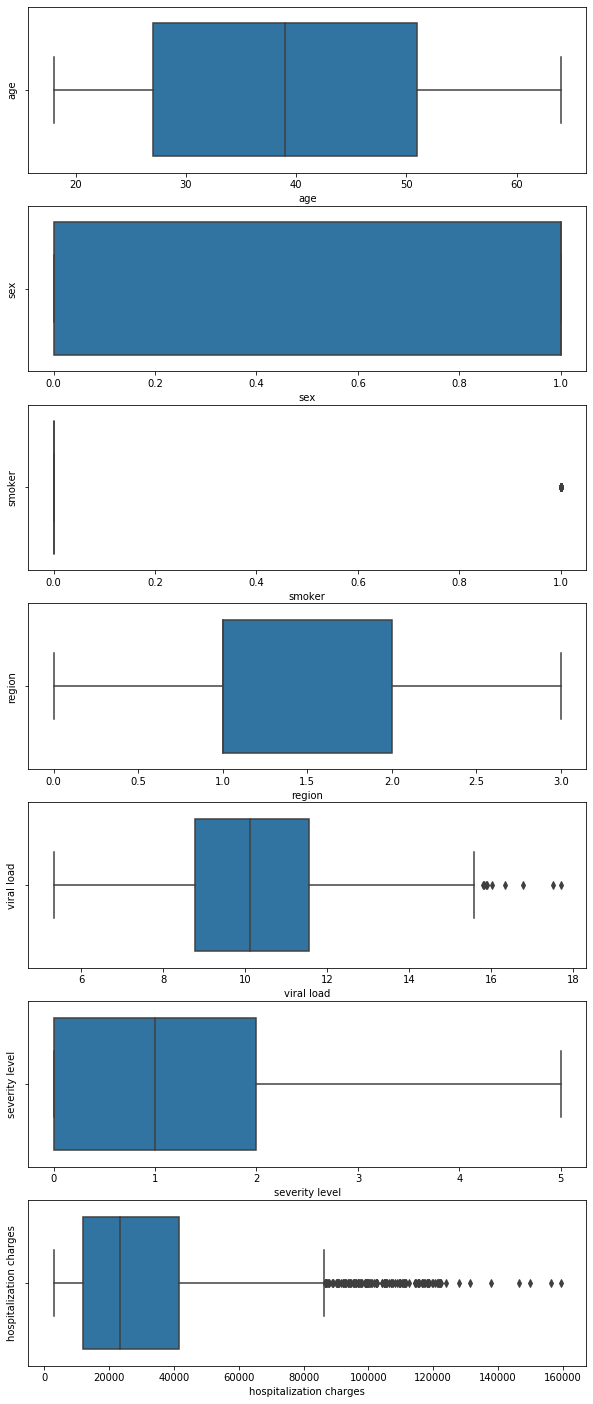

In [15]:
box_plots(df)

### the following for loop will plot the univariate box histplot for all the features

### we infer the same conclusions as boxplot. 

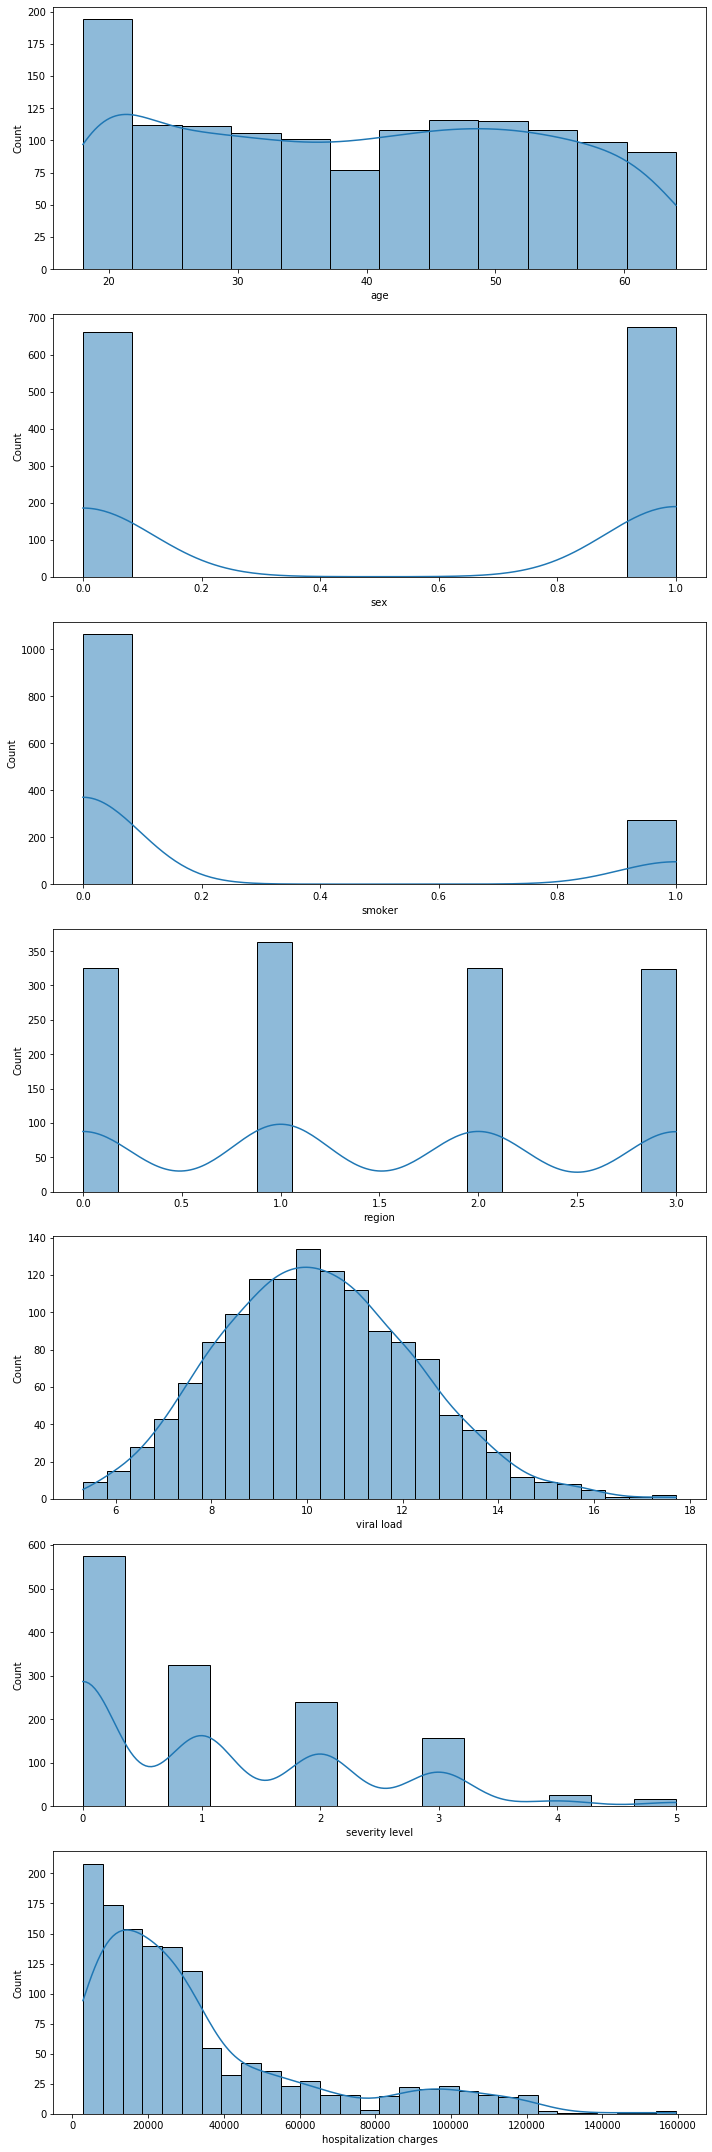

In [16]:
fig, axes = plt.subplots(7,1,figsize=(10,30))
for col, ax in zip(df.columns,axes.ravel()):
    sns.histplot(data=df,x=col,ax=ax,kde=True)
    plt.xlabel(col)
fig.tight_layout()
plt.show()

In [17]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,0,1,0,9.30,0,42212
1,18,1,0,1,11.26,1,4314
2,28,1,0,1,11.00,3,11124
3,33,1,0,2,7.57,0,54961
4,32,1,0,2,9.63,0,9667


## Bivariate Analysis

### the hospitilization charges does not depend on region

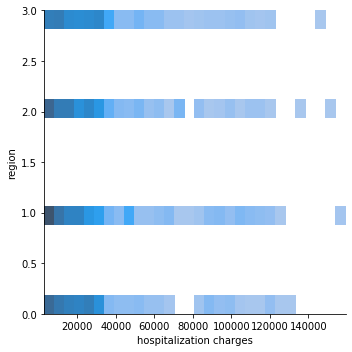

In [18]:
sns.displot(x=df['hospitalization charges'],y=df['region'])
plt.show()

### the hospitalization charges of smokers tends to be higher side when compared to non smokers

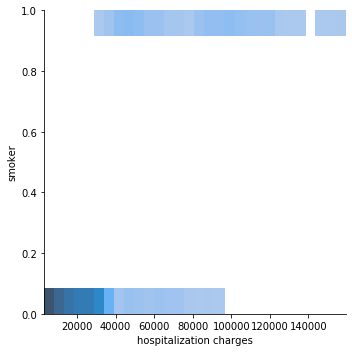

In [19]:
sns.displot(x=df['hospitalization charges'],y=df['smoker'])
plt.show()

### we can not estimate a clear relation between viral load and hospitalization charges

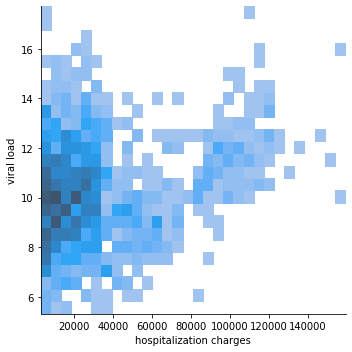

In [20]:
sns.displot(x=df['hospitalization charges'],y=df['viral load'])
plt.show()

### their is an inverse relation between severity level and hospitalization charges

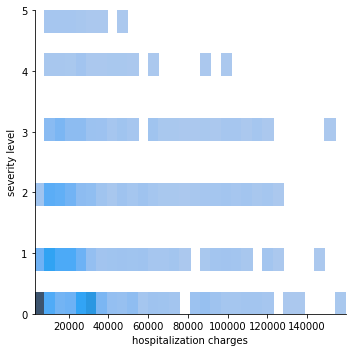

In [21]:
sns.displot(x=df['hospitalization charges'],y=df['severity level'])
plt.show()

### the hospitilization charges does not depend on the sex 

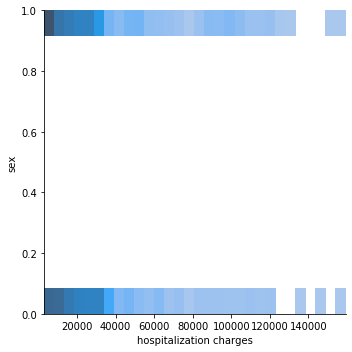

In [22]:
sns.displot(x=df['hospitalization charges'],y=df['sex'])
plt.show()

### the hospitilazition charges does not depend on the age

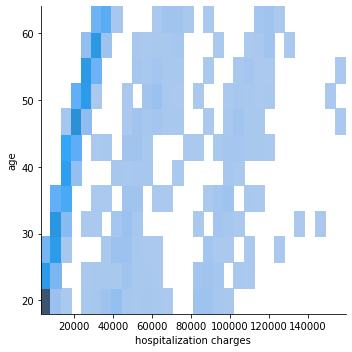

In [23]:
sns.displot(x=df['hospitalization charges'],y=df['age'])
plt.show()

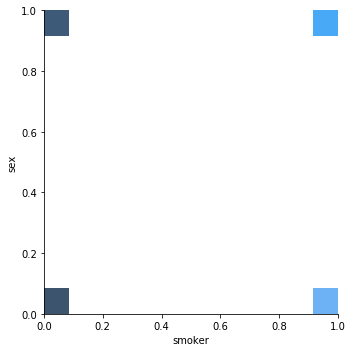

In [37]:
sns.displot(x=df['smoker'],y=df['sex'])
plt.show()

## Hypothesis Testing:

#### Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't?

### Assumptions of z test
##### 1) The population mean and standerd deviation are finite. 2) Population standerd deviation are known.

### H0(Null Hypothesis)


In [16]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,0,1,0,9.30,0,42212
1,18,1,0,1,11.26,1,4314
2,28,1,0,1,11.00,3,11124
3,33,1,0,2,7.57,0,54961
4,32,1,0,2,9.63,0,9667


In [17]:
df_smoker = df[df['smoker']==1]

In [18]:
df_non_smoker = df[df['smoker']==0]

In [19]:
df_smoker.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,0,1,0,9.30,0,42212
11,62,0,1,1,8.76,0,69522
14,27,1,1,1,14.04,0,99029
19,30,1,1,0,11.77,0,92094
23,34,0,1,3,10.64,1,94255


In [20]:
df_non_smoker.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
1,18,1,0,1,11.26,1,4314
2,28,1,0,1,11.00,3,11124
3,33,1,0,2,7.57,0,54961
4,32,1,0,2,9.63,0,9667
5,31,0,0,1,8.58,0,9392


### Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't? 

### Assumptions of Z-test
1) The population mean and standerd deviation are finite. 2) Population standerd deviation are known.

## Ho(Null hypothesis):-
hospitialization of people does not depends on smoking(feature).
##### (U1) mean hosptilization rate of people who smoke <= (U2) mean hospitilization rate of people who does not smoke.

### Ha(Alternate Hypothesis):- 
(U1) mean hosptilization rate of people who smoke > (U2) mean hospitilization rate of people who does not smoke.

## alpha(significance level or type I error ):-
considering 0.025 significance level

In [21]:
np.mean(df_smoker['hospitalization charges']),np.mean(df_non_smoker['hospitalization charges'])

(80125.57299270073, 21085.6757518797)

In [22]:
np.std(df_smoker['hospitalization charges']),np.std(df_non_smoker['hospitalization charges'])

(28801.18992162662, 14977.412277719432)

### here the mean and the std are finet so wee can use z test

In [23]:
zscore = (np.mean(df_smoker['hospitalization charges'])-np.mean(df_non_smoker['hospitalization charges']))/np.sqrt(np.var(df_smoker['hospitalization charges'])/len(df_smoker['hospitalization charges'])+np.var(df_non_smoker['hospitalization charges'])/len(df_non_smoker['hospitalization charges']))

In [24]:
zscore

32.80888958143

In [25]:
1-stats.norm.cdf(zscore)

0.0

In [26]:
from statsmodels.stats.weightstats import ztest

In [27]:
ztest(df_smoker['hospitalization charges'],df_non_smoker['hospitalization charges'],alternative='larger')

(46.66489219013773, 0.0)

### pvalue is 0 < 0.025

### as pvalue < 0.025(soignificance level) we reject null hypothesis and accept the alternate hypothesis

### Prove (or disprove) with statistical evidence that the viral load of females is different from that of males

## Assumptions of Z-test
#### 1) The population mean and standerd deviation are finite. 2) Population standerd deviation are known.

## Ho(Null hypothesis):-
#### hospitialization of people does not depends on sex(feature).

#### (U1) mean hosptilization rate of male = (U2) mean hospitilization rate female.
## Ha(Alternate Hypothesis):-
#### (U1) mean hosptilization rate of male != (U2) mean hospitilization rate female.

## alpha(significance level or type I error ):-
#### considering 0.05 significance level

In [28]:
df_male = df[df['sex']==1]

In [29]:
df_female = df[df['sex']==0]

In [30]:
df_male.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
1,18,1,0,1,11.26,1,4314
2,28,1,0,1,11.00,3,11124
3,33,1,0,2,7.57,0,54961
4,32,1,0,2,9.63,0,9667
8,37,1,0,3,9.94,2,16016


In [31]:
np.mean(df_male['viral load']),np.mean(df_female['viral load'])

(10.314423076923074, 10.126072507552859)

In [32]:
np.std(df_male['viral load']), np.std(df_female['viral load'])

(2.045374661864287, 2.01387895412623)

#### mean and the std are known and finete so we can use z test

In [33]:
zscore = (np.mean(df_male['viral load'])-np.mean(df_female['viral load']))/np.sqrt((np.var(df_male['viral load'])/len(df_male['viral load']))+(np.var(df_female['viral load'])/len(df_female['viral load'])))

In [34]:
zscore

1.6972554799209714

In [35]:
(1-stats.norm.cdf(zscore))*2

0.08964837020886884

#### pvale is 0.089 > 0.05

## conclusion
#### as the pvalue is greater than 0.05(significance level) we failed to reject the null hypothesis

## z test using inbuilt library

In [36]:
from statsmodels.stats.weightstats import ztest

In [37]:
ztest(df_male['viral load'],df_female['viral load'])

(1.695711164450323, 0.08994059315726398)

### Is the proportion of smoking significantly different across different regions?

## Chi-square test
#### Test of independence(in this test we will be verifying are the 2 variables independent or not)
## Assumptions of chi-square test
#### As Chi-square test is non-parameter test(i.e., it did not any assumptions).
## Ho(Null hypothesis)
#### smoking is independent of region
## Ha(Alternate hypothesis)
#### smoking id dependent on region

In [38]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,0,1,0,9.30,0,42212
1,18,1,0,1,11.26,1,4314
2,28,1,0,1,11.00,3,11124
3,33,1,0,2,7.57,0,54961
4,32,1,0,2,9.63,0,9667


In [39]:
df_crosstab = pd.crosstab(df['smoker'],df['region'],margins=True)

In [40]:
df_crosstab

region,0,1,2,3,All
smoker,,,,,
0,267,273,267,257,1064
1,58,91,58,67,274
All,325,364,325,324,1338


In [41]:
df_crosstab[2][1]

58

In [42]:
chisquare = 0
for i in df['smoker'].unique():
    for j in df['region'].unique():
        observed = df_crosstab[j][i]
        expected = df_crosstab[j]['All']*df_crosstab['All'][i]/df_crosstab['All']['All']
        chisquare += pow((observed-expected),2)/expected

In [43]:
chisquare

7.343477761407069

In [44]:
pvalue = 1 -  stats.chi2.cdf(chisquare,(len(df['smoker'].unique())-1)*(len(df['region'].unique())-1))

In [45]:
chisquare,pvalue

(7.343477761407069, 0.06171954839170546)

### pvalue is 0.061 > 0.05

## conclusion  
#### as the pvalue is greater than 0.05 significance level we fail to reject the null hypothesis.

### Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence 

## Annova
### Assumptions
#### Each group observations are qaussian(almost). Each group variance is almost the same.
## Ho(Null hupothesis)
#### mean viral load of women does not change with severity level
## Ha(Alternate hypothesis)
#### mean viral load of women change with severity level
## alpha(significance level or type I error ):-
#### considering 5% significance level

In [46]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,0,1,0,9.30,0,42212
1,18,1,0,1,11.26,1,4314
2,28,1,0,1,11.00,3,11124
3,33,1,0,2,7.57,0,54961
4,32,1,0,2,9.63,0,9667


In [47]:
df[(df['sex']==0) & (df['severity level']==1)]

,age,sex,smoker,region,viral load,severity level,hospitalization charges
6,46,0,0,1,11.15,1,20601
16,52,0,0,3,10.26,1,26993
21,30,0,0,0,10.80,1,10374
23,34,0,1,3,10.64,1,94255
58,53,0,1,1,7.63,1,58112
...,...,...,...,...,...,...,...
1262,41,0,0,1,9.35,1,16925
1263,43,0,0,0,9.97,1,18344
1287,36,0,0,0,8.63,1,13681
1299,19,0,0,2,8.58,1,6777


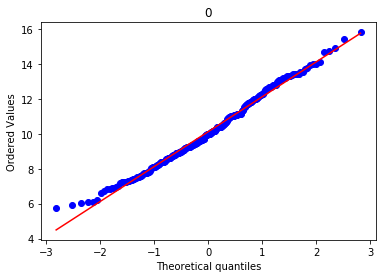

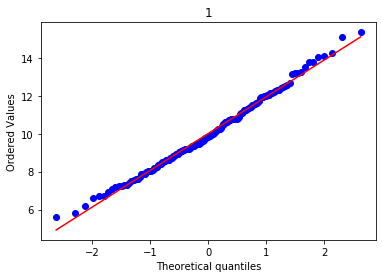

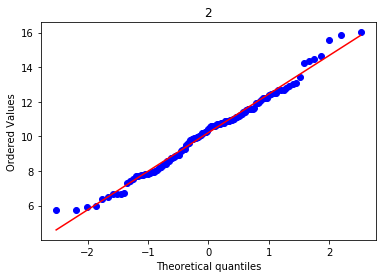

In [48]:
for i in range(3):
    stats.probplot(df[(df['sex']==0) & (df['severity level']==i)]['viral load'],dist='norm',plot=plt)
    plt.title(i)
    plt.show()

#### the 3 seviarity levels follow normal distribution 

In [35]:
np.std(df[(df['sex']==0) & (df['severity level']==0)]['viral load']),np.std(df[(df['sex']==0) & (df['severity level']==1)]['viral load']),np.std(df[(df['sex']==0) & (df['severity level']==2)]['viral load'])

(1.9856270286492823, 1.9229509682292343, 2.200382675951407)

#### the std of all the 3 seviarity level are almost same so we can use anova 

In [49]:
stats.f_oneway(df[(df['sex']==0) & (df['severity level']==0)]['viral load'],df[(df['sex']==0) & (df['severity level']==1)]['viral load'],df[(df['sex']==0) & (df['severity level']==2)]['viral load'])

F_onewayResult(statistic=0.3355061434584082, pvalue=0.7151189650367746)

### pvalue is 0.71 > 0.05

 ## conclusion
 #### as the pvalues is greater than 0.05 we failed to reject null null hypothesis and accept alternate hypothesis

# Business insights

## smokes tends to pay higher hospital charges 
## their are more male smokers than female smokers 
## hospitilization charges of seviarity level 0,1 2 are in higher side. 
## from chisquare test some is dependent on region.
## the male hospitilization charges are almost the same as female hospitilization charges

# Recommendations

### as from chisquare test we can see that smoking is dependent on region and the avarage hospitilazation charges of the smokers is greater than the non smokers so we can say that the hospitilazition charges of the region with more smokers tends to be in higher side
### as  the hospitilization charges of seviarity level 0, 1 and 2 are in higher side and the seviarity level does not depends on the women so their is high chances that women pay more.
### as males smoke more when compared to female and the person who smoke will have higher probability to pay more hospityilization charges so male tends to pay more hospitilization charges than female